<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>Predicción del Nivel de Pobreza de Hogares en Costa Rica</h1>
<h3>Aprendizaje Automático No Supervisado</h3>
</center>
</left>
<h4>Julieta Bergamasco</h4>
</left>

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el quinto y último práctico del proyecto, correspondiente a la materia Aprendizaje Automático No Supervisado. El objetivo consiste en aplicar distintas técnicas de análisis exploratorio de datos (EDA) al dataset, de modo de encontrar patrones sistematizables. Es decir que, a los fines de este práctico, por un momento nos olvidaremos de nuestro problema original de clasificación múltiple y de que tenemos datos etiqutados con sus respectivas clases.

Luego, una vez aplicadas las técnicas de aprendizaje no supervisado y del cálculo de las métricas pertinentes, podremos recurrir a las etiquetas de clases con el fin de contrastar los resultados obtenidos.

A pesar de que no serán utilizadas las etiquetas en una primera instancia, será importante evaluar el desbalance de clases y qué decisiones tomarán al respecto.

Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [33]:
import numpy as np
import pandas as pd

import mlflow.sklearn
import clean
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import seaborn as sns
# import sklearn as skl
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
from sklearn.model_selection import train_test_split, GridSearchCV
from ml.visualization import plot_confusion_matrix, plot_learning_curve
import datetime
import mlflow
np.random.seed(0)  # Para mayor determinismo
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, Perceptron, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc

In [34]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

# Resolución

## I. Preprocesamiento

### 1. Carga de Datos

Para comenzar, importamos los datos que vamos a utilizar:

In [42]:
# Cargamos el dataset original en una variable

_ds = pd.read_csv('clean_dataset.csv',index_col=0)
_ds.head()

_ds_test = pd.read_csv('https://raw.githubusercontent.com/jbergamasco/DiploDatos2019/master/ProyectoPobrezaCostaRica/DatasetPobCR_Test.csv')


In [36]:
# Cargamos el Dataset Fields en una variable, para tener la información de cada campo a mano
# Si hay nueva metadata, cargarla posteriormente
url_fields_info = 'https://raw.githubusercontent.com/solujan/DiploDatos2019/master/ProyectoPobrezaCostaRica/Dataset%20Fields.csv'
_data_fields = pd.read_csv(url_fields_info, sep=';')
_data_fields

,Variable_name,Variable_description
0,v2a1,Monthly rent payment
1,hacdor,=1 Overcrowding by bedrooms
2,rooms,number of all rooms in the house
3,hacapo,=1 Overcrowding by rooms
4,v14a,=1 has bathroom in the household
5,refrig,=1 if the household has refrigerator
6,v18q,owns a tablet
7,v18q1,number of tablets household owns
8,r4h1,Males younger than 12 years of age
9,r4h2,Males 12 years of age and older


Recuerden que la variable `Target` constituye nuestro objetivo original de predicción. Es la etiqueta de los datos de acuerdo al nivel de pobreza del hogar que habita cada individuo, según la siguiente escala o clases:

1 = pobreza extrema<br>
2 = pobreza moderada<br>
3 = hogares vulnerables<br>
4 = hogares no vulnerables<br>

<div class="alert alert-block alert-info">
El dataset ya está **listo para trabajar!**
</div>

### 2. Aplicar Script de Curación

Dataset ya curado


### 3.Preparacion de datos

In [40]:
import importlib
importlib.reload(clean)

#X_train, y_train = clean.create_random_oversample(X_train, y_train)


#X_train, y_train = clean.create_smote_oversample(X_train, y_train)

X_train, X_test, y_train, y_test= clean.prepare_data(_ds, True)
X_train, y_train = clean.create_adasyn_oversample(X_train, y_train)


Preparing data...
Drop multicollinearity
Normalize
Mix, Divide and Train
Creating ADASYN Oversampling
[(1, 4822), (2, 4933), (3, 4878), (4, 4767)]


### 4. Preparacion datos de test

In [44]:
_ds_test.shape

(23856, 114)

In [53]:
import importlib
importlib.reload(clean)
_ds_test = pd.read_csv('https://raw.githubusercontent.com/jbergamasco/DiploDatos2019/master/ProyectoPobrezaCostaRica/DatasetPobCR_Test.csv')
test_clean_ds = clean.clean(_ds_test, False)
print(test_clean_ds.shape)
X_val, columns = clean.prepare_data(test_clean_ds)
X_val.shape

Columnas eliminadas:  ['SQBescolari' 'SQBage' 'SQBhogar_total' 'SQBedjefe' 'SQBhogar_nin'
 'SQBovercrowding' 'SQBdependency' 'SQBmeaned' 'agesq']
Columnas eliminadas: edjefe, edjefa, dependency, meaneduc, rez_esc, hhsize, r4t1, r4t2, r4t3,r4m3, r4h3, hogar_total, elimbasu5
(23856, 114)
Cantidad de familias sin caracteristicas comunes:  35
(23856, 114)
Cantidad de familias sin caracteristicas comunes:  11
(23856, 114)
(23856, 114)
(23856, 114)
(23856, 114)


D:\Diplo\workspace\DiploDatos2019\ProyectoPobrezaCostaRica\clean.py:155: FutureWarning: `item` has been deprecated and will be removed in a future version
  return x


New synthetic features: tech_individuo, tech_hogar, monthly_rent_log,             bedrooms_to_rooms, edu_jefe, rent_to_rooms, SQBage, SQBhogar_total, child_dependency,            rooms_per_person, rooms_per_person, female_weight, male_weight. 
(23856, 126)
Total Features:  2 objetos + 124 numerical = 126 features
(23856, 126)
(23856, 126)
Preparing data...
Drop multicollinearity
Normalize


(23856, 111)

In [55]:
def create_submission_file(X_val , model, model_name):
    filename = model_name + '_submission.csv'
    yy = model.predict(X_val.drop(["idhogar","Id"], axis=1))
    yy = yy.astype(np.int)
    submission = pd.DataFrame(list(zip(X_val.Id, yy)), columns=["Id", "Target"])
    submission.to_csv(filename, header=True, index=False)

## I. Aplicación de Modelos de Introduccion

### Perceptron

In [56]:
# En principio, pueden utilizar el módulo que sigue, con los parámetros por defecto y los que definan a continuación:
penalty = 'l1'
alpha =  0.0001
max_iter = 1000
tol = 0.01


model = Perceptron(penalty = penalty, alpha = alpha, fit_intercept=True, max_iter = max_iter, tol = tol, shuffle=True, random_state=0, class_weight=None, warm_start=False,verbose=1)
model.fit(X_train, y_train)

create_submission_file(X_val, model, 'perceptron')

c:\users\soluj\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 151.27, NNZs: 79, Bias: -1.000000, T: 19400, Avg. loss: 2.459415
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 239.00, NNZs: 70, Bias: -6.000000, T: 38800, Avg. loss: 2.045233
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 307.94, NNZs: 75, Bias: -5.000000, T: 58200, Avg. loss: 1.957463
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 365.74, NNZs: 68, Bias: -6.000000, T: 77600, Avg. loss: 1.900802
Total training time: 0.16 seconds.
-- Epoch 5
Norm: 416.90, NNZs: 68, Bias: -5.000000, T: 97000, Avg. loss: 1.913547
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 461.05, NNZs: 70, Bias: -7.000000, T: 116400, Avg. loss: 1.909140
Total training time: 0.23 seconds.
-- Epoch 7
Norm: 504.34, NNZs: 70, Bias: -9.000000, T: 135800, Avg. loss: 1.839658
Total training time: 0.27 seconds.
-- Epoch 8
Norm: 544.69, NNZs: 73, Bias: -7.000000, T: 155200, Avg. loss: 1.828017
Total training time: 0.32 seconds.
-- Epoch 9
Norm: 580.17, NNZs: 67, Bias: -9.000000, T: 174600

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished


Exactitud del algoritmo para conjunto de entrenamiento: 0.40
Exactitud del algoritmo para conjunto de validación: 0.61
              precision    recall  f1-score   support

           1       0.20      0.51      0.29       145
           2       0.42      0.09      0.14       320
           3       0.22      0.08      0.12       247
           4       0.76      0.87      0.81      1187

    accuracy                           0.61      1899
   macro avg       0.40      0.39      0.34      1899
weighted avg       0.59      0.61      0.57      1899


Accuracy: 0.6087



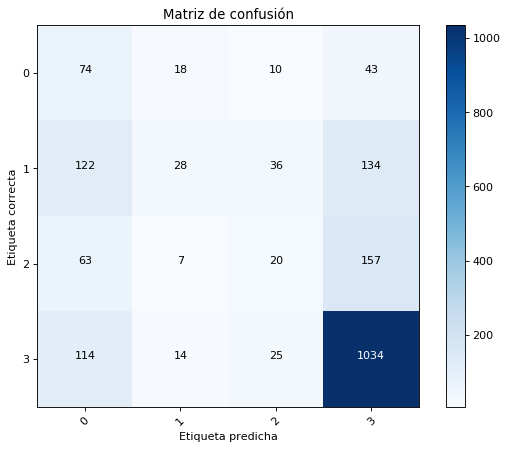

In [21]:
y_pred_train =  model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =   model.predict(X_test.drop(['Id','idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

print(classification_report(y_test, y_pred_test), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")
'''save_mlflow("Perceptron",
            model, 
            classification_report(y_test, y_pred, output_dict=True),
            model.get_params(),
            {"dataset": "individual"}, 
            accuracy_train,
            accuracy_test)'''
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[0, 1, 2, 3],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

### KNN

In [58]:
n_neighbors = 1
metric =  'manhattan'
algorithm = 'brute'
leaf_size = 15
p= 1
weights= 'uniform'


model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, algorithm=algorithm, leaf_size= leaf_size, p=p, weights=weights)
model.fit(X_train , y_train)
create_submission_file(X_val, model, 'perceptron')

c:\users\soluj\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


MemoryError: Unable to allocate array with shape (6918, 19400) and data type float64

In [45]:
neigh_param = {'n_neighbors':[1,5,10],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [15,30,45,90],
              'p':[1,2,4],
              'metric':['euclidean','manhattan','minkowski','chebyshev']
              }
neigh = KNeighborsClassifier()
model = GridSearchCV(neigh, neigh_param, 
                         scoring='accuracy', 
                         verbose=1,
                         n_jobs=-1,
                         cv=3)
model.fit(X_train , np.ravel(y_train))

print("# Exploración de hiperparámetros para función de coste ", end="\n\n")
    
print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 51.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 106.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 184.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 310.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 446.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 618.5min


KeyboardInterrupt: 

Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.81
              precision    recall  f1-score   support

           1       0.72      0.70      0.71       145
           2       0.69      0.72      0.70       320
           3       0.68      0.64      0.66       247
           4       0.88      0.88      0.88      1187

    accuracy                           0.81      1899
   macro avg       0.74      0.74      0.74      1899
weighted avg       0.81      0.81      0.81      1899


Accuracy: 0.8110



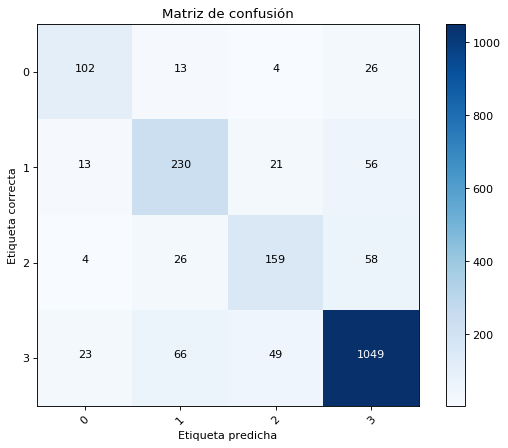

In [8]:
y_pred_train = model.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test = model.predict(X_test.drop(['Id','idhogar'], axis=1))  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

print(classification_report(y_test, y_pred_test), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

'''save_mlflow("KNeighborsClassifier",
            model, 
            classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params() ,
            {"dataset": "individual"}, 
            accuracy_train,
            accuracy_test)'''

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[0, 1, 2, 3],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

## II. Aplicación de Modelos de Aprendizaje Automático No Supervisado

Utilizando los datos obtenidos, se aplicarán técnicas de reducción de dimensionalidad y el modelo K-Means de Clustering, tanto a `_ds_individuo` como a `_ds_hogar`.

### 1. Descomposivión de Variables: Principal Component Analysis

A continuación se aplicará la técnica de descomposición por Análisis de Componente Principal (PCA).

In [12]:
# Utilizar diferentes valores para el parámetro n_components
from sklearn.decomposition import PCA
pca = PCA(random_state=42,n_components=100)
pca_ind = pca.fit(X_train)
#pca_hog = pca.fit(_ds_hogar)

In [13]:
# Utilizar pca.components_ para analizar las causas latentes
#let's check the shape of X_pca array
X_pca=pca.transform(X_train) 
print("shape of X_pca", X_pca.shape)


shape of X_pca (23729, 100)


c:\users\soluj\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


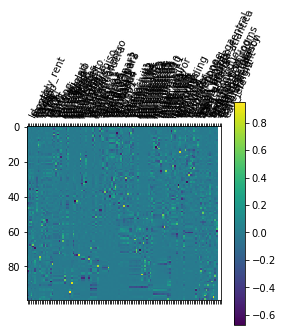

In [14]:
plt.matshow(pca.components_,cmap='viridis')

plt.colorbar()
plt.xticks(range(len(new_df.columns)),new_df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [15]:
X_pca

array([[-5.68890233e-01, -1.25509832e-01,  3.59584081e-01, ...,
         2.94500547e-02, -1.58452330e-02,  4.48168916e-02],
       [-8.34563421e-01,  4.47979594e-02,  1.45514911e+00, ...,
        -1.47063434e-02, -1.50955551e-02,  6.08773430e-03],
       [-1.06107017e+00, -7.04220684e-01,  1.27157410e+00, ...,
         1.58758012e-02, -7.23050660e-03, -9.89545686e-02],
       ...,
       [ 1.07644568e+00, -1.14651763e+00, -3.02365314e-01, ...,
         6.66991888e-03, -1.07240338e-02, -2.04344144e-02],
       [ 8.95455792e-01, -1.16830917e+00, -5.06394707e-01, ...,
         1.17486732e-02, -6.54421649e-03, -6.88115954e-03],
       [ 1.22084551e+00, -1.12160973e+00, -2.12555653e-01, ...,
         1.15204142e-03, -4.19398038e-03, -1.65431249e-02]])

#### Factor Analysis

Factor Analysis (FA) is an exploratory data analysis method used to search influential underlying factors or latent variables from a set of observed variables. It helps in data interpretations by reducing the number of variables. It extracts maximum common variance from all variables and puts them into a common score.

Assumptions:

- There are no outliers in data.
- Sample size should be greater than the factor.
- There should not be perfect multicollinearity.
- There should not be homoscedasticity between the variables.

In [172]:
clean_ds.drop(['Id', 'idhogar','Target'], axis=1, inplace=True)

##### Adequacy Test
Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

- Bartlett’s Test
- Kaiser-Meyer-Olkin Test

###### Bartlett’s Test
Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [175]:
clean_ds.head()

,monthly_rent,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4m1,r4m2,tamhog,tamviv,escolari,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,region_central,region_chorotega,region_pacifico_central,region_brunca,region_huetar_atlantica,region_huetar_norte,zona_urbana,zona_rural,age,tech_individuo,tech_hogar,monthly_rent_log,bedrooms_to_rooms,rent_to_rooms,SQBage,SQBhogar_total,child_dependency,rooms_per_person,female_weight,male_weight,edu_jefe
0,190000.000000,0,3,0,1,1,0,0.0,0,1,0,0,1,1,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,1,1.0,12.154779,0.333333,63333.333333,1849,1,0.0,0.333333,0.00,1.00,100
1,135000.000000,0,4,0,1,1,1,1.0,0,1,0,0,1,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4,4.0,11.813030,0.250000,33750.000000,4489,4,0.0,0.500000,0.00,1.00,144
2,328862.222222,0,8,0,1,1,0,0.0,0,0,0,1,1,1,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,0,0.0,12.703394,0.250000,41107.777778,8464,4,0.0,0.250000,1.00,0.00,121
3,180000.000000,0,5,0,1,1,1,1.0,0,2,1,1,4,4,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,4,16.0,12.100712,0.600000,36000.000000,289,16,0.5,0.800000,0.25,0.25,121
4,180000.000000,0,5,0,1,1,1,1.0,0,2,1,1,4,4,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,4,16.0,12.100712,0.600000,36000.000000,1369,16,0.5,0.800000,0.25,0.25,121


In [176]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(clean_ds)
#chi_square_value, p_value = calculate_bartlett_sphericity(X_train)

chi_square_value, p_value



(nan, nan)

###### Kaiser-Meyer-Olkin (KMO) Test 
Measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.



In [149]:
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
kmo_all,kmo_model=calculate_kmo(new_df.drop(['Id','idhogar'], axis=1))
kmo_model

nan

##### Choosing the Number of Factors
For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [73]:
new_df.describe()

,monthly_rent,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4m1,r4m2,tamhog,tamviv,escolari,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,techozinc,techoentrepiso,techocane,cielorazo,abastaguadentro,abastaguafuera,public,planpri,noelec,sanitario1,sanitario2,sanitario3,sanitario5,energcocinar1,energcocinar2,energcocinar3,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,epared1,epared2,etecho1,etecho2,eviv1,eviv2,dis,male,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,hogar_nin,hogar_adul,hogar_mayor,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,computer,television,mobilephone,qmobilephone,region_central,region_chorotega,region_pacifico_central,region_brunca,region_huetar_atlantica,zona_urbana,age,Target,tech_individuo,tech_hogar,monthly_rent_log,bedrooms_to_rooms,rent_to_rooms,SQBage,SQBhogar_total,child_dependency,rooms_per_person,female_weight,male_weight,edu_jefe
count,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.0,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.00000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000
mean,0.236738,0.038024,0.394934,0.023805,0.995050,0.957447,0.230672,0.053648,0.077080,0.194794,0.066481,0.277000,0.249886,0.220989,0.342111,0.592585,0.077944,0.188540,0.008637,0.116179,0.013166,0.001475,0.692227,0.223299,0.000948,0.001053,0.016431,0.977143,0.017485,0.003160,0.677059,0.964504,0.031915,0.886560,0.000316,0.002212,0.003897,0.214346,0.763746,0.015483,0.001896,0.488203,0.459764,0.882979,0.030230,0.084158,0.001369,0.0,0.102064,0.328945,0.128397,0.289130,0.100695,0.254055,0.057510,0.483463,0.137666,0.123552,0.26838,0.031915,0.063092,0.033390,0.311881,0.183906,0.380345,0.012218,0.009585,0.051506,0.010112,0.002423,0.013377,0.003160,0.012745,0.156157,0.288135,0.095323,0.135033,0.170213,0.208553,0.186328,0.113124,0.017485,0.015483,0.138614,0.248413,0.242175,0.621129,0.097746,0.181483,0.017169,0.101643,0.285443,0.975142,0.281904,0.587845,0.092163,0.062671,0.082262,0.094059,0.715715,0.354185,3.299768,0.416737,0.073316,0.587109,0.495755,0.145131,0.175171,0.123329,0.295667,0.142072,0.035577,0.126129,0.187073
std,0.174287,0.191264,0.146372,0.152448,0.070189,0.201858,0.421285,0.114983,0.136236,0.129604,0.115518,0.155507,0.147956,0.134320,0.224610,0.491379,0.268098,0.391163,0.092538,0.320456,0.113992,0.038374,0.461597,0.416479,0.030776,0.032439,0.127134,0.149454,0.131076,0.056127,0.467625,0.185040,0.175783,0.317147,0.017774,0.046982,0.062309,0.410389,0.424803,0.123472,0.04

In [ ]:
# Create factor analysis object and perform factor analysis
from factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer()
fa.fit(new_df.drop(['Id','idhogar'], axis=1))
# Check Eigenvalues
#fa.loadings_


In [ ]:

fa = FactorAnalysis(n_components=7, random_state=0)
fa_ind = fa.fit_transform(_ds_individuo)
fa_hog = fa.fit_transform(_ds_hogar)

Si se animan, pueden usar una red neuronal como encoder para la reducción de dimensionalidad.

***Hint: *** [En el siguiente link](https://medium.com/intuitive-deep-learning/autoencoders-neural-networks-for-unsupervised-learning-83af5f092f0b)

### 2.  K-Means Clustering

In [68]:
X = new_df.drop(['Id','idhogar'], axis=1).select_dtypes(exclude=['float64'])[4000:].values
X.shape

(5494, 84)

A continuación se aplicará K-Means para clasificar en clusters nuestros datasets.

For n_clusters = 2 The average silhouette_score is : 0.1354272505832062
For n_clusters = 3 The average silhouette_score is : 0.09107743043354027
For n_clusters = 4 The average silhouette_score is : 0.06603658219483477
For n_clusters = 5 The average silhouette_score is : 0.062028722983938495
For n_clusters = 6 The average silhouette_score is : 0.06505237102322295


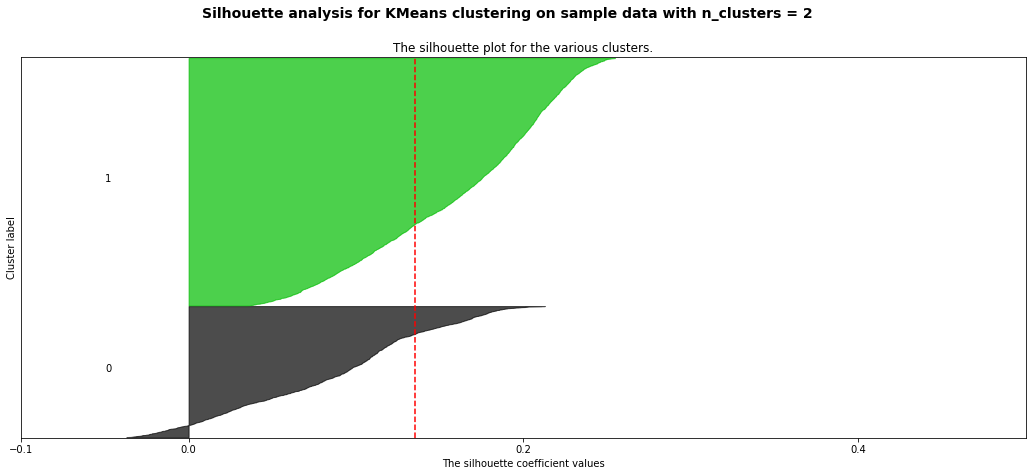

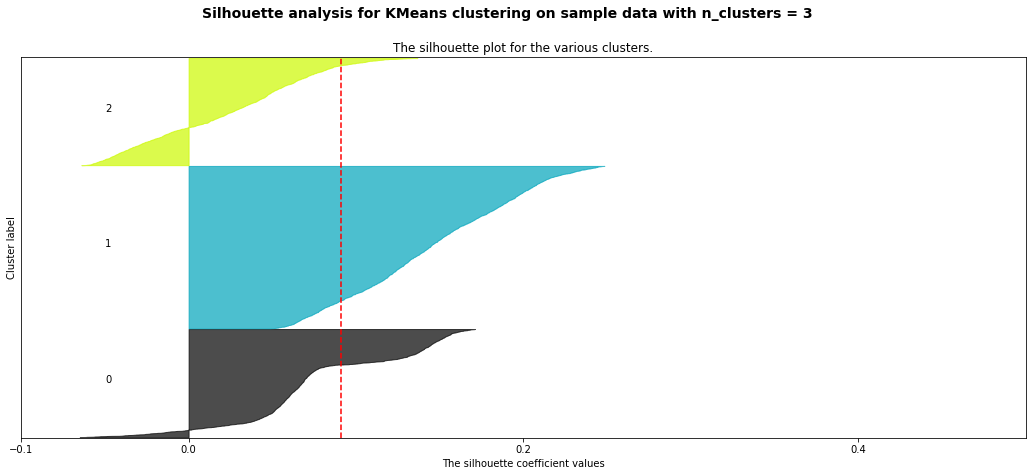

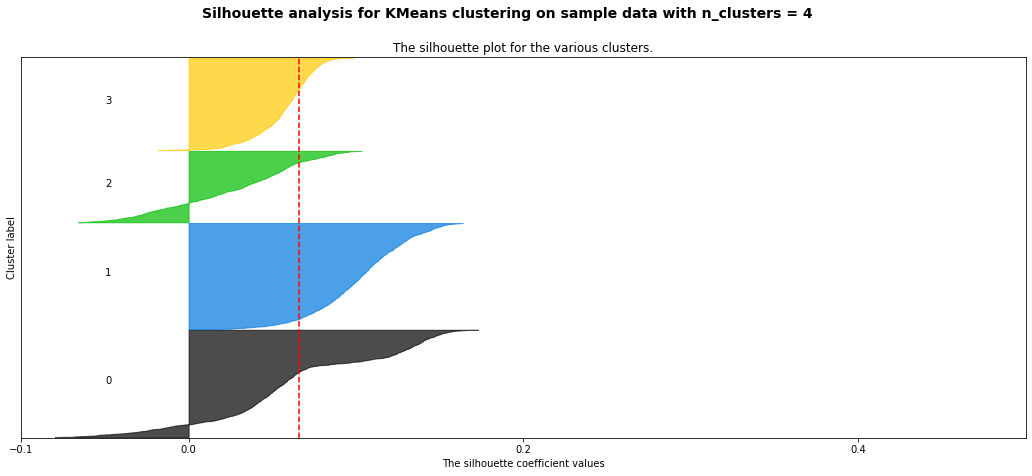

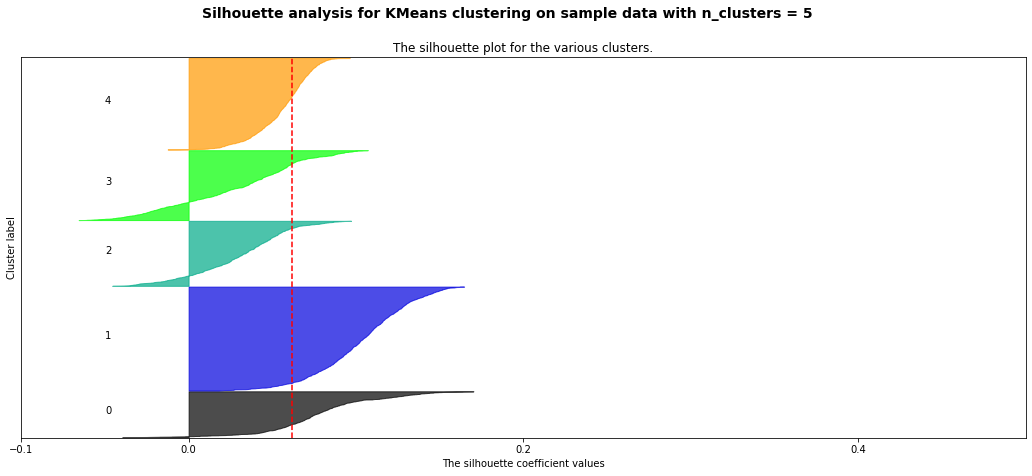

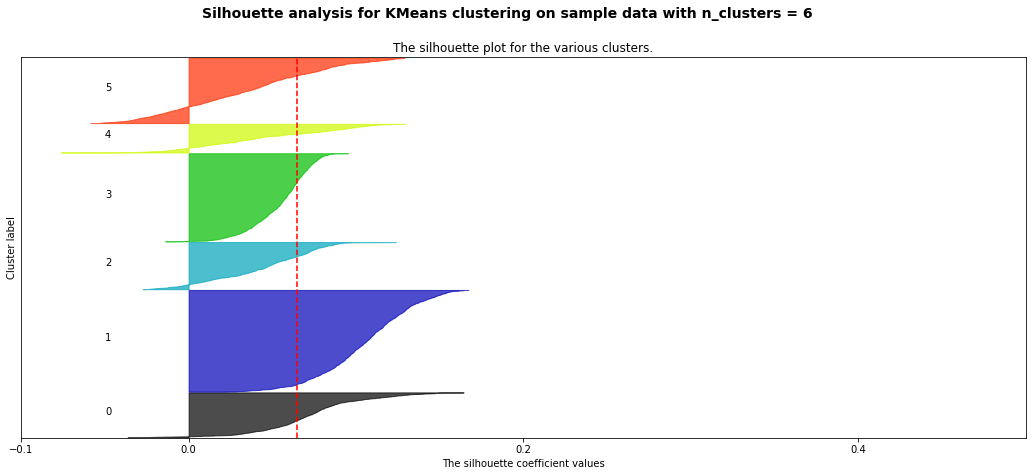

In [69]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
#X = new_df.drop(['Id','idhogar'], axis=1).select_dtypes(exclude=['float64'])[4000:].values


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 0.5])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #            c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [70]:

num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X_pca)

clusters = km.labels_.tolist()

NameError: name 'X_pca' is not defined

El cluster 0 tiene 2935 elementos 

El cluster 1 tiene 9221 elementos 

El cluster 2 tiene 287 elementos 

El cluster 3 tiene 5148 elementos 



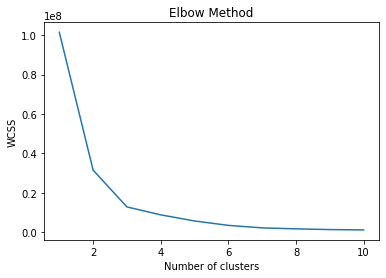

In [95]:
# Recuento del número de elementos en cada cluster

    
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=100, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

clusters = kmeans.labels_.tolist()  
for i in range(num_clusters):
    print ('El cluster %i tiene %i elementos \n' % (i, clusters.count(i)))

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
# Agrupar por clusters y clases los datasets, utilizando .count()
X_pca['cluster'] = clusters
X_pca['cluster'].value_counts()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [68]:
# Calcular estadísticos relevantes para variables clave del dataset, diferenciados por cada cluster
# Pueden usar .describe()

In [69]:
# Para encontrar los centroides y analizarlos pueden utilizar lo siguiente:
centroids = km.cluster_centers_   # centroids = km.centroids
order_centroids = centroids.argsort()[:, ::-1]

In [72]:
# Aplicar método de Elbow para identificar el número de clusters óptimo
n = 4
sum_sq_dist = []
list_k = list(range(1, n))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_pca)
    sum_sq_dist.append(km.inertia_)

In [76]:
# Calcular la métrica de la silueta. Pueden usar los módulos silhouette_samples y silhouette_score
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X_pca, clusters)

MemoryError: Unable to allocate array with shape (9494, 9494) and data type float64

Graficar diferentes variables de interés por cluster y por clase, y compararlos.

En caso de que hayan dividido en Train/Test los datasets y utilizado la misma cantidad de clusters que de clases en las etiquetas originales, pueden calcular las métricas convencionales. Graficar clusters versus clases originales.

In [157]:
df= pd.read_csv("bfi.csv")

In [158]:
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [159]:
df.dropna(inplace=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
Unnamed: 0    2436 non-null int64
A1            2436 non-null float64
A2            2436 non-null float64
A3            2436 non-null float64
A4            2436 non-null float64
A5            2436 non-null float64
C1            2436 non-null float64
C2            2436 non-null float64
C3            2436 non-null float64
C4            2436 non-null float64
C5            2436 non-null float64
E1            2436 non-null float64
E2            2436 non-null float64
E3            2436 non-null float64
E4            2436 non-null float64
E5            2436 non-null float64
N1            2436 non-null float64
N2            2436 non-null float64
N3            2436 non-null float64
N4            2436 non-null float64
N5            2436 non-null float64
O1            2436 non-null float64
O2            2436 non-null int64
O3            2436 non-null float64
O4            2436 non-null float

In [161]:
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18210.19955392496, 0.0)